# 1. Simple classification on the Fashion MNIST dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 33s 7us/step


In [ ]:
# Preprcess the images

train_images = train_images / 255.0
test_images = test_images / 255.0


In [122]:
# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.4335 - accuracy: 0.7088
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6924 - accuracy: 0.7587
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5984 - accuracy: 0.7868
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5540 - accuracy: 0.8077
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5429 - accuracy: 0.8097
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5250 - accuracy: 0.8162
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5146 - accuracy: 0.8198
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8252
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5023 - accuracy: 0.8251
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.495

In [123]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5867 - accuracy: 0.8025


[0.5866650938987732, 0.8025000095367432]

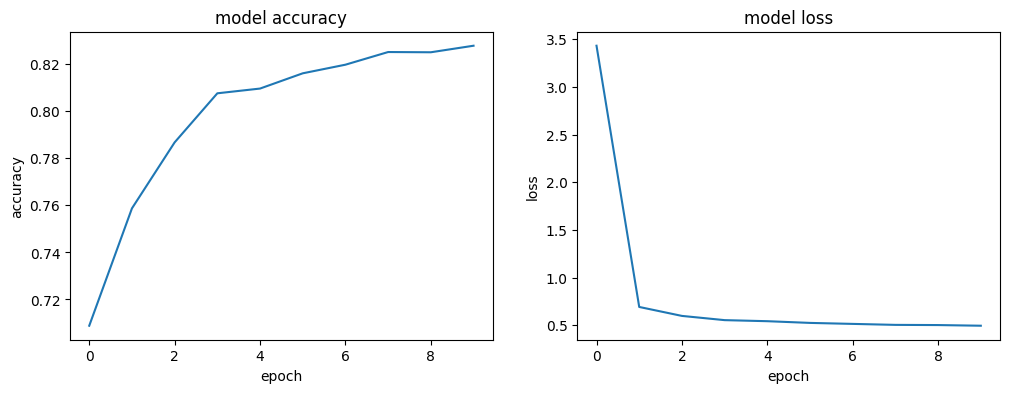

In [124]:
# plotting history for accuracy
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plotting history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# 2. Adding noise and Denoising


In [134]:
# Defining noise function and injecting noise to train samples

import numpy as np

def add_noise(images, noise_level):
    noisy_images = images + noise_level * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)
    return noisy_images

num_noisy_samples = int(0.5 * len(train_images))
noisy_indices = np.random.choice(len(train_images), num_noisy_samples, replace=False)
train_images_noisy = train_images.copy()
train_images_noisy[noisy_indices] = add_noise(train_images_noisy[noisy_indices], noise_level=0.25)

In [135]:
# Fitting the noisy data to the model

noisy_history = model.fit(train_images_noisy, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1765 - accuracy: 0.5810
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0326 - accuracy: 0.6467
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9254 - accuracy: 0.6897
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8517 - accuracy: 0.7103
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7989 - accuracy: 0.7235
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7719 - accuracy: 0.7462
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7650 - accuracy: 0.7527
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7695 - accuracy: 0.7495
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7451 - accuracy: 0.7499
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.71

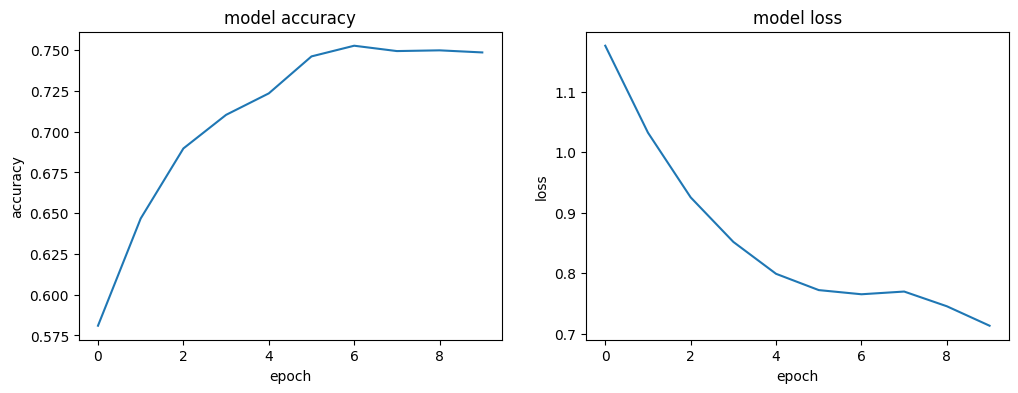

In [136]:
# plotting history for accuracy
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(noisy_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plotting history for loss
plt.subplot(122)
plt.plot(noisy_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [137]:
# injecting noise to test samples

num_noisy_test = int(0.5 * len(test_images))
noisy_indices_test = np.random.choice(len(test_images), num_noisy_test, replace=False)
test_images_noisy = test_images.copy()
test_images_noisy[noisy_indices_test] = add_noise(test_images_noisy[noisy_indices_test], noise_level=0.25)

model.evaluate(test_images_noisy, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0683 - accuracy: 0.7338


[1.0683194398880005, 0.7337999939918518]